In [4]:
from sklearn.model_selection import train_test_split
import random
from our_tests import fit_our_model, fit_sklearn_l1, fit_sklearn_no_penalty
import numpy as np
import pandas as pd
import openml
from generating_dataset import generate_dataset
from preprocessing import split, check_feature_sample_ratio, delete_corr_columns, fill_na, assign_target_column, add_permuted_columns, one_hot_encode_categorical, drop_categorical

# Arythmia

In [5]:
col_names = [f"attr{i}" for i in range(1, 280)]
df_arythmia = pd.read_csv("./data/arythmia/arrhythmia.data", header=None, names=col_names, na_values="?")
print(df_arythmia.head())
df_arythmia = df_arythmia.reset_index()
df_arythmia.columns = df_arythmia.columns.astype(str)


    attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  attr9  attr10  \
75      0    190     80     91    193    371    174    121    -16    13.0   
56      1    165     64     81    174    401    149     39     25    37.0   
54      0    172     95    138    163    386    185    102     96    34.0   
55      0    175     94    100    202    380    179    143     28    11.0   
75      0    190     80     88    181    360    177    103    -16    13.0   

    ...  attr270  attr271  attr272  attr273  attr274  attr275  attr276  \
75  ...      0.0      9.0     -0.9      0.0      0.0      0.9      2.9   
56  ...      0.0      8.5      0.0      0.0      0.0      0.2      2.1   
54  ...      0.0      9.5     -2.4      0.0      0.0      0.3      3.4   
55  ...      0.0     12.2     -2.2      0.0      0.0      0.4      2.6   
75  ...      0.0     13.1     -3.6      0.0      0.0     -0.1      3.9   

    attr277  attr278  attr279  
75     23.3     49.4        8  
56     20.4     38.8        

class 0 is normal, class 1 are different types of arythmia

In [6]:
assign_target_column(df_arythmia, "attr279", [i for i in range(2,16)])
fill_na(df_arythmia)
delete_corr_columns(df_arythmia)
check_feature_sample_ratio(df_arythmia)
X, y, X_train,X_valid, X_test, y_train, y_valid, y_test = split(df_arythmia)

Unique values of label column [ 8  6 10  1  7 14  3 16  2  4  5  9 15]
target
0    267
1    185
Name: count, dtype: int64
attr10 8 null values
attr11 22 null values
attr12 1 null values
attr13 376 null values
attr14 1 null values
deleted features: ['attr160', 'attr163', 'attr170', 'attr184', 'attr192', 'attr193', 'attr194', 'attr203', 'attr207', 'attr211', 'attr214', 'attr217', 'attr224', 'attr234', 'attr243', 'attr254', 'attr263', 'attr273']
Shape after deletion (452, 262)
The number of features is enough: True, number of features: 262


In [7]:
y_no_penalty = fit_sklearn_no_penalty(X_train, y_train, X_test, y_test, max_iter=100)
y_l1 = fit_sklearn_l1(X_train, y_train, X_test, y_test, max_iter=100)
y_our = fit_our_model(X_train, y_train, X_test, y_test)

Test accuracy for sklearn model l1: 0.6324
Test accuracy for sklearn model l1: 0.6250
Test accuracy for our model l1: 0.7206


# Secom

In [8]:
df_data = pd.read_csv("./data/secom/secom.data", sep=' ', header=None, na_values="NaN")  
df_label = pd.read_csv("./data/secom/secom_labels.data",sep=' ', header=None, na_values="NaN")

df_label.columns = ["label", "timestamp"]
df_secom = pd.concat([df_data, df_label["label"]], axis=1)
print("Shape:", df_secom.shape)
df_secom.columns = df_secom.columns.astype(str)


Shape: (1567, 591)


In [9]:
assign_target_column(df_secom, "label", [1])
fill_na(df_secom)
delete_corr_columns(df_secom)
df_secom = add_permuted_columns(df_secom)
delete_corr_columns(df_secom)
check_feature_sample_ratio(df_secom)
X, y, X_train,X_valid, X_test, y_train, y_valid, y_test = split(df_secom)

Unique values of label column [-1  1]
target
0    1463
1     104
Name: count, dtype: int64
0 6 null values
1 7 null values
2 14 null values
3 14 null values
4 14 null values
5 14 null values
6 14 null values
7 9 null values
8 2 null values
9 2 null values
10 2 null values
11 2 null values
12 2 null values
13 3 null values
14 3 null values
15 3 null values
16 3 null values
17 3 null values
18 3 null values
19 10 null values
21 2 null values
22 2 null values
23 2 null values
24 2 null values
25 2 null values
26 2 null values
27 2 null values
28 2 null values
29 2 null values
30 2 null values
31 2 null values
32 1 null values
33 1 null values
34 1 null values
35 1 null values
36 1 null values
37 1 null values
38 1 null values
39 1 null values
40 24 null values
41 24 null values
42 1 null values
43 1 null values
44 1 null values
45 1 null values
46 1 null values
47 1 null values
48 1 null values
49 1 null values
50 1 null values
51 1 null values
52 1 null values
53 4 null values
54 4 null 

In [12]:
y_no_penalty = fit_sklearn_no_penalty(X_train, y_train, X_test, y_test, max_iter=2000)
y_l1 = fit_sklearn_l1(X_train, y_train, X_test, y_test, max_iter=100)
y_our = fit_our_model(X_train, y_train, X_test, y_test)

Test accuracy for sklearn model l1: 0.8259
Test accuracy for sklearn model l1: 0.8323
Test accuracy for our model l1: 0.9257


# braidflow

In [13]:
pd.set_option('display.max_columns', None)

dataset = openml.datasets.get_dataset(45966)

df_braidflow, y, categorical, numeric = dataset.get_data(dataset_format='dataframe', target=dataset.default_target_attribute)

df_braidflow["label"] = y
print("Shape:", df_braidflow.shape)
print(df_braidflow.head(1))
df_braidflow["label"].value_counts()

Shape: (72, 124)
   UID  task_id  action_absorption  action_accord  action_fluidity  care  \
0    1        5                  3              7                6     3   

   challenge_match  clear_mindedness  control  demand  \
0                4                 5        6       4   

   factor_absorption_by_activity  factor_fluency_of_performance  \
0                            3.5                       6.333333   

   factor_perceived_fit_of_skill_and_task_demands  \
0                                             5.0   

   factor_subjective_value_of_activity  focus  forward_thinking  fss_score  \
0                             2.333333      7                 7        5.2   

   loss_of_time_perception  lost_in_thought  perceived_difficulty  relevance  \
0                        6                1                     4          3   

   self_evaluation  worry task_braid  task_braid_revolutions  \
0                7      1     VBRAID                       6   

   task_braid_strands  bra

label
neutral    37
fall       18
flow       17
Name: count, dtype: int64

In [14]:
assign_target_column(df_braidflow, "label", ["flow"])
df_braidflow = drop_categorical(df_braidflow)
fill_na(df_braidflow)
delete_corr_columns(df_braidflow)
check_feature_sample_ratio(df_braidflow)
X, y, X_train,X_valid, X_test, y_train, y_valid, y_test = split(df_braidflow)

Unique values of label column ['neutral' 'flow' 'fall']
target
0    55
1    17
Name: count, dtype: int64
Number of columns to keep 118, to delete 6
disk_acc_mean_lateral 6 null values
disk_acc_mean_medial 6 null values
disk_acc_mean_overall 6 null values
disk_acc_peaks_lateral 6 null values
disk_acc_peaks_medial 6 null values
disk_acc_peaks_overall 6 null values
disk_acc_std_lateral 6 null values
disk_acc_std_medial 6 null values
disk_acc_std_overall 6 null values
disk_speed_mean_lateral 6 null values
disk_speed_mean_medial 6 null values
disk_speed_mean_overall 6 null values
disk_flips 21 null values
disk_heading_movements 6 null values
disk_heading_rhythm_5 6 null values
disk_heading_rhythm_10 6 null values
disk_heading_rhythm_15 6 null values
disk_heading_rhythm_20 6 null values
disk_heading_rhythm_25 6 null values
disk_heading_rhythm_30 6 null values
disk_heading_rhythm_35 6 null values
disk_heading_rhythm_40 6 null values
disk_heading_rhythm_45 6 null values
disk_heading_rhythm_res

In [15]:
y_no_penalty = fit_sklearn_no_penalty(X_train, y_train, X_test, y_test, max_iter=100)
y_l1 = fit_sklearn_l1(X_train, y_train, X_test, y_test, max_iter=100)
y_our = fit_our_model(X_train, y_train, X_test, y_test)

Test accuracy for sklearn model l1: 0.7727
Test accuracy for sklearn model l1: 0.6818
Test accuracy for our model l1: 0.8182


# lsvt

speech signal processing

In [1]:
from sklearn.model_selection import train_test_split
import random
from our_tests import fit_our_model, fit_sklearn_l1, fit_sklearn_no_penalty
import numpy as np
import pandas as pd
import openml
from generating_dataset import generate_dataset
from preprocessing import split, check_feature_sample_ratio, delete_corr_columns, fill_na, assign_target_column, add_permuted_columns, one_hot_encode_categorical, drop_categorical

In [2]:
dataset = openml.datasets.get_dataset(1484)
df_lsvt, y, categorical, numeric = dataset.get_data(dataset_format='dataframe', target=dataset.default_target_attribute)

df_lsvt["label"] = y
print("Shape:", df_lsvt.shape)
print(df_lsvt.head(1))
df_lsvt["label"].value_counts()

Shape: (126, 311)
         V1        V2       V3        V4        V5        V6        V7  \
0  0.088112  0.041697  0.00048 -0.000004  0.000422  2.458381  0.000001   

          V8          V9       V10  ...      V302       V303       V304  \
0  47.021079  1366.43039 -7.103323  ...  7.088978  19.753255  54.335046   

        V305        V306        V307         V308         V309         V310  \
0  145.52863  375.097397  921.296579  2137.079844  4697.131077  9931.208257   

   label  
0      1  

[1 rows x 311 columns]


label
2    84
1    42
Name: count, dtype: int64

In [3]:
assign_target_column(df_lsvt, "label", ['1'])
fill_na(df_lsvt)
delete_corr_columns(df_lsvt)
check_feature_sample_ratio(df_lsvt)
X, y, X_train,X_valid, X_test, y_train, y_valid, y_test = split(df_lsvt)

Unique values of label column ['1', '2']
Categories (2, object): ['1' < '2']
target
0    84
1    42
Name: count, dtype: int64
deleted features: ['V2', 'V3', 'V5', 'V7', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22', 'V29', 'V30', 'V32', 'V33', 'V35', 'V36', 'V38', 'V39', 'V41', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V50', 'V55', 'V61', 'V63', 'V70', 'V72', 'V73', 'V76', 'V79', 'V82', 'V126', 'V127', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V151', 'V152', 'V153', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V

In [4]:
y_no_penalty = fit_sklearn_no_penalty(X_train, y_train, X_test, y_test, max_iter=1000)
y_l1 = fit_sklearn_l1(X_train, y_train, X_test, y_test, max_iter=1000)
y_our = fit_our_model(X_train, y_train, X_test, y_test)

Test accuracy for sklearn model l1: 0.6316
Test accuracy for sklearn model l1: 0.4211
Test accuracy for our model l1: 0.6842


Performance on test set:
ROC AUC: 0.8814102564102564
Recall-Precision AUC: 0.6953802432206322
F-score: 0.7407407407407408
Balanced Accuracy: 0.8205128205128205
Coefficient values obtained:
Coefficients: [-0.03264388  0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.01089162 -0.         -0.01288971  0.00388218 -0.05753434 -0.
  0.         -0.         -0.01438082 -0.0150577   0.          0.
 -0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.03124731 -0.08528859  0.0799502   0.01992103  0.01136831
  0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.04017254  0.
 -0.         -0.         -0.          0.         -0.          0.
  0.     

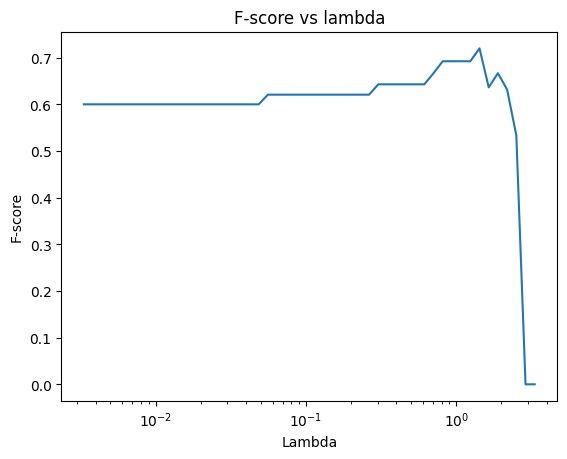

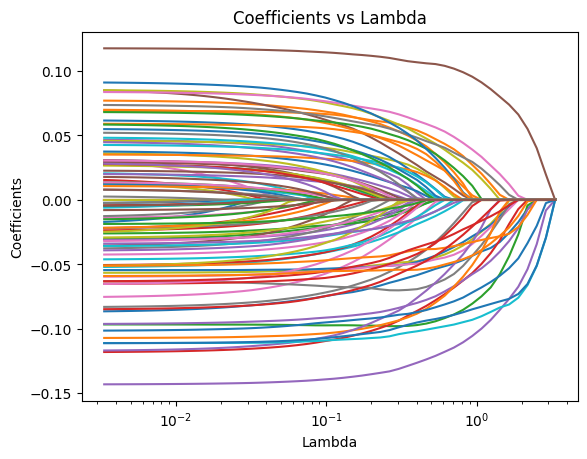

In [5]:
from Implementation import logisitic_regression
model = logisitic_regression()
model.fit(X_train, y_train, max_iter=50, a=1, weights=True, lambdas=None, fit_intercept=True, X_valid=X_valid, y_valid=y_valid, measure='F-score')

y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

roc_auc = model.ROC_AUC(y_test, y_proba)
prc_auc = model.PR_AUC(y_test, y_proba)
f_score = model.evaluate(y_test, y_proba, 'F-score')
balanced_accuracy = model.evaluate(y_test, y_proba, 'balanced accuracy')

print("Performance on test set:")
print("ROC AUC:", roc_auc)
print("Recall-Precision AUC:", prc_auc)
print("F-score:", f_score)
print("Balanced Accuracy:", balanced_accuracy)

print("Coefficient values obtained:")
print("Coefficients:", model.B)
print("Intercept:", model.B0)

model.plot(X_valid, y_valid, 'F-score')
model.plot_coefficients()

# Generated

In [20]:
X, y = generate_dataset(0.3, 100, 5, 0.8, seed=42)